In [86]:
import matplotlib.pyplot as plt
import vibration_toolbox as vtb
import numpy as np
import scipy as sp
from ipywidgets import interact, interact_manual, FloatSlider, interactive, HBox, VBox, widgets, Label

/Users/jslater/anaconda3/envs/latest/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  This is separate from the ipykernel package so we can avoid doing imports until


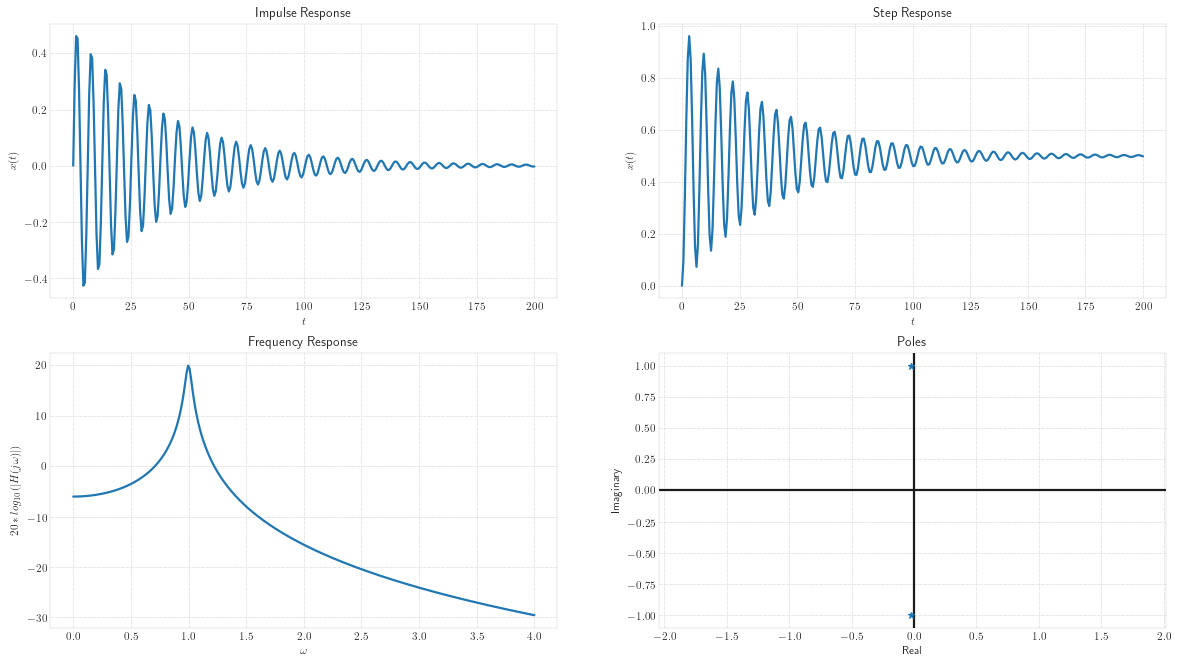

zeta = 0.025, omega_n = 1.00


In [122]:
def plot_sdof_resp(m = 1.0, c = 0.2, k = 100.0):
    
    # This only does anything when the user accidentally sends in integers instead of floats. 
    if k == 0:
        k = 1e-10
    
    if m == 0:
        m = 1e-10
            
    omega_n = np.sqrt(k / m)
    
    zeta = c / 2 / np.sqrt(m * k)
    
    if zeta < 1.0 and np.abs(zeta) > 1e-6:
        omega_d = omega_n * np.sqrt(1 - zeta**2)
        
        # Approximately 4 times the settling time
        tmax = 4 /zeta / omega_n      
        tmin = 0
        
        if tmax < 0:
            tmax = -tmax
        
        # guess reasonable amount of time - lock to first decimal place
        maxtime = np.ceil(tmax/10**np.floor(np.log10(tmax)))*10**np.floor(np.log10(tmax))
        
        num_cycles = maxtime*omega_n / 2 / np.pi
        
        num_points = np.max([200, int(10*num_cycles)])
        
        if num_points > 1000:
            num_points = 1000
            print("You don't have enough resolution to see this plot. Expect aliasing issues.")

        t = np.linspace(0, maxtime, num_points)

        decay = np.exp(-zeta*omega_n*t)
        
        impulse_response = 1/m * decay * np.sin(omega_d * t)
        
        phi = np.arctan(zeta/(np.sqrt(1-zeta**2)))
        step_response = 1/k * (1 - decay * np.cos(omega_d*t - phi))
        
        max_freq = omega_n*4
        
        max_freq = np.ceil(max_freq/10**np.floor(np.log10(max_freq)))*10**np.floor(np.log10(max_freq))
        
        omega = np.linspace(0, max_freq, num_points)
        s = sp.sqrt(-1.0)*omega
        freq_response = 1/(m*s**2+c*s+k)
        
        roots = np.array([[-zeta*omega_n-omega_d*sp.sqrt(-1.0)],[-zeta*omega_n+omega_d*sp.sqrt(-1)]])        

    elif zeta > 1.0:
        
        if zeta-1 < 1e-8:
            print('adjusting zeta.')
            zeta = 1 + 1e-8
          
        roots = np.array([[(-c+np.sqrt(c**2-4*m*k))/2/c],
                          [(-c-np.sqrt(c**2-4*m*k))/2/c]])
        
        tmax = -4 /( (-c+np.sqrt(c**2-4*m*k))/2/c )
        # guess reasonable amount of time - lock to first decimal place
        maxtime = np.ceil(tmax/10**np.floor(np.log10(tmax)))*10**np.floor(np.log10(tmax))
        
        num_points = 300
        t = np.linspace(0, maxtime, num_points)

        # Impulse response

        x0 = 0
        v0 = 1/m
        C1 = (x0 * omega_n * (zeta + np.sqrt(zeta**2 - 1)) + v0
              ) / 2 / omega_n / np.sqrt(zeta**2 - 1)
        C2 = (-x0 * omega_n * (zeta - np.sqrt(zeta**2 - 1)) - v0
              ) / 2 / omega_n / np.sqrt(zeta**2 - 1)
        impulse_response = C1 * np.exp(
            (-zeta + np.sqrt(zeta**2 - 1)) * omega_n * t) + C2 * np.exp(
                (-zeta - np.sqrt(zeta**2 - 1)) * omega_n * t)

        # Step response
        
        x0 = -1/k
        v0 = 0/m
        C1 = (x0 * omega_n * (zeta + np.sqrt(zeta**2 - 1)) + v0
              ) / 2 / omega_n / np.sqrt(zeta**2 - 1)
        C2 = (-x0 * omega_n * (zeta - np.sqrt(zeta**2 - 1)) - v0
              ) / 2 / omega_n / np.sqrt(zeta**2 - 1)
        step_response = 1/k + C1 * np.exp(
            (-zeta + np.sqrt(zeta**2 - 1)) * omega_n * t) + C2 * np.exp(
                (-zeta - np.sqrt(zeta**2 - 1)) * omega_n * t)
       
        max_freq = omega_n*4
        
        max_freq = np.ceil(max_freq/10**np.floor(np.log10(max_freq)))*10**np.floor(np.log10(max_freq))
        
        omega = np.linspace(0, max_freq, num_points)
        s = sp.sqrt(-1.0)*omega
        freq_response = 1/(m*s**2+c*s+k)
        
    elif np.abs(zeta)<1e-5:
        omega_d = omega_n
        
        # Approximately 8 cycles
        tmax = 8 * 2 * np.pi / omega_n      
        tmin = 0

        
        # guess reasonable amount of time - lock to first decimal place
        maxtime = np.ceil(tmax/10**np.floor(np.log10(tmax)))*10**np.floor(np.log10(tmax))
        
        num_cycles = maxtime*omega_n / 2 / np.pi
        
        num_points = np.max([200, int(10*num_cycles)])
        
        if num_points > 1000:
            num_points = 1000
            print("You don't have enough resolution to see this plot. Expect aliasing issues.")

        t = np.linspace(0, maxtime, num_points)

        decay = np.zeros_like(t)
        
        impulse_response = 1/m * np.sin(omega_d * t)
        
        step_response = 1/k * (1 -  np.cos(omega_d*t))
        
        max_freq = omega_n*4
        
        max_freq = np.ceil(max_freq/10**np.floor(np.log10(max_freq)))*10**np.floor(np.log10(max_freq))
        
        omega = np.linspace(0, max_freq, num_points)
        s = sp.sqrt(-1.0)*omega
        freq_response = 1/(m*s**2+c*s+k)
        
        roots = np.array([[-zeta*omega_n-omega_d*sp.sqrt(-1.0)],[-zeta*omega_n+omega_d*sp.sqrt(-1)]])           

    fig = plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
    
    ax1 = fig.add_subplot(221)
    ax1.set_xlabel('$t$')
    ax1.set_ylabel('$x(t)$')
    ax1.set_title('Impulse Response')
    ax1.plot(t, impulse_response)
    
    ax2 = fig.add_subplot(222)
    ax2.set_xlabel('$t$')
    ax2.set_ylabel('$x(t)$')
    ax2.set_title('Step Response')
    ax2.plot(t, step_response)
    
    ax3 = fig.add_subplot(223)
    ax3.set_xlabel('$\\omega$')
    ax3.set_ylabel('$20*log_{10}(|H(j\\omega)|)$')
    ax3.set_title('Frequency Response')
    ax3.plot(omega, 20*np.log10(np.abs(freq_response)))
             
    ax4 = fig.add_subplot(224)
    ax4.set_xlabel('Real')
    ax4.set_ylabel('Imaginary')
    ax4.set_title('Poles')
    ax4.axis('equal')
    # ax4.axis([-3, 3, -3, 3])
    ax4.axhline(y=0, color='k')
    ax4.axvline(x=0, color='k')
    ax4.plot(np.real(roots), np.imag(roots),'*')
    plt.show()
    
    print('zeta = {:.3f}, omega_n = {:.2f}'.format(zeta, omega_n))
plot_sdof_resp(2,0.1,2)

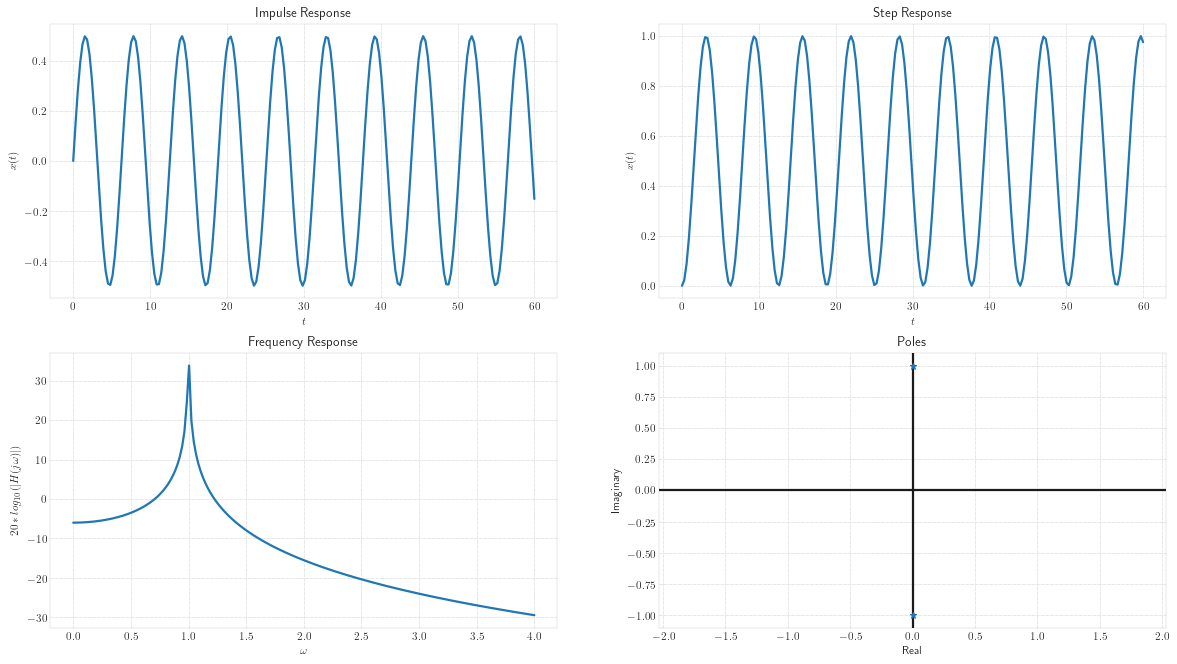

zeta = 0.0, omega_n = 1.0


In [40]:
plot_sdof_resp(2,0,2)

In [121]:
m_slide = widgets.FloatSlider(min = 1e-5, max = 20, step = .1, value = 5, continuous_update=False)
k_slide = FloatSlider(min = 1e-5, max = 1000, step = 1., value = 100, continuous_update=False)
c_slide = FloatSlider(min = -1, max = 50, step = .1, value = 2, continuous_update=False)

m_label = widgets.Label('Mass')
c_label = Label('Damping')
k_label = Label('Stiffness')

m_slider = widgets.VBox([m_label, m_slide])
c_slider = widgets.VBox([c_label, c_slide])
k_slider = widgets.VBox([k_label, k_slide])

ui = widgets.HBox([m_slider, c_slider, k_slider])

out = widgets.interactive_output(plot_sdof_resp, {'m': m_slide, 'c': c_slide, 'k': k_slide})

sdof_responses = widgets.VBox([ui,out])
#sdof = display(ui, out)
display(sdof_responses)

In [95]:
sdof

In [103]:
zeta

NameError: name 'zeta' is not defined

In [117]:
print('{:10.2f}'.format(aa))

      0.12


In [104]:
aa = .123456

In [105]:
aa


0.123456